# Challenge

## Is it possible to predict the Math score in the ENEM Brazilian National Test?

![ENEM](https://www.ufrb.edu.br/portal/images/noticias2019/enem2019.jpg)

### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *
from scipy.stats import kurtosis, skew

pd.set_option('display.max_columns',200)

### Loading datasets

In [2]:
# Train dataset
df_train = pd.read_csv('train.csv')
# Test dataset
df_test = pd.read_csv('test.csv')

# Creating answer dataframe
answer = pd.DataFrame()

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            4576 non-null   object 
 1   CO_UF_RESIDENCIA        4576 non-null   int64  
 2   SG_UF_RESIDENCIA        4576 non-null   object 
 3   NU_IDADE                4576 non-null   int64  
 4   TP_SEXO                 4576 non-null   object 
 5   TP_COR_RACA             4576 non-null   int64  
 6   TP_NACIONALIDADE        4576 non-null   int64  
 7   TP_ST_CONCLUSAO         4576 non-null   int64  
 8   TP_ANO_CONCLUIU         4576 non-null   int64  
 9   TP_ESCOLA               4576 non-null   int64  
 10  TP_ENSINO               1480 non-null   float64
 11  IN_TREINEIRO            4576 non-null   int64  
 12  TP_DEPENDENCIA_ADM_ESC  1480 non-null   float64
 13  IN_BAIXA_VISAO          4576 non-null   int64  
 14  IN_CEGUEIRA             4576 non-null   

### Exploratory data analysis

In [5]:
# Saving the registration number:
answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [6]:
# Droping the registration number from train and test dataframes:
df_train.drop(['NU_INSCRICAO'], axis=1, inplace=True)
df_test.drop(['NU_INSCRICAO'], axis=1, inplace=True)

In [7]:
# Checking dataframe shape
df_train.shape, df_test.shape

((13730, 166), (4576, 46))

In [8]:
#By checking the shape of the datasets we can see that there are more columns in the training data than in the 
#test data, so we will use only the features that exist in the test dataframe to analyze and determine which 
#features we should use to make the prediction.

cols = list(df_test)
cols.append('NU_NOTA_MT')

train = df_train[cols]
test = df_test

In [9]:
# Viewing training data:
train.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


In [10]:
# Viewing test data:
test.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [11]:
# Checking dataframe shape after transformation
train.shape, test.shape

((13730, 47), (4576, 46))

In [12]:
# Creating a funtion to summarize dataframe information

def data_summary(df):
    '''Summary dataframe information'''

    df = pd.DataFrame({'type': df.dtypes,
                       'amount': df.isna().sum(),
                       'null_values (%)': (df.isna().sum() / df.shape[0]) * 100,
                       'unique': df.nunique()})
    return df

In [13]:
# Train summary:
data_summary(train)

,type,amount,null_values (%),unique
CO_UF_RESIDENCIA,int64,0,0.000000,27
SG_UF_RESIDENCIA,object,0,0.000000,27
NU_IDADE,int64,0,0.000000,55
TP_SEXO,object,0,0.000000,2
TP_COR_RACA,int64,0,0.000000,6
TP_NACIONALIDADE,int64,0,0.000000,5
TP_ST_CONCLUSAO,int64,0,0.000000,4
TP_ANO_CONCLUIU,int64,0,0.000000,11
TP_ESCOLA,int64,0,0.000000,4
TP_ENSINO,float64,9448,68.812819,3


In [14]:
# Test summary:
data_summary(test)

,type,amount,null_values (%),unique
CO_UF_RESIDENCIA,int64,0,0.000000,27
SG_UF_RESIDENCIA,object,0,0.000000,27
NU_IDADE,int64,0,0.000000,46
TP_SEXO,object,0,0.000000,2
TP_COR_RACA,int64,0,0.000000,6
TP_NACIONALIDADE,int64,0,0.000000,5
TP_ST_CONCLUSAO,int64,0,0.000000,4
TP_ANO_CONCLUIU,int64,0,0.000000,11
TP_ESCOLA,int64,0,0.000000,3
TP_ENSINO,float64,3096,67.657343,3


### Analysing target "NU_NOTA_MT"

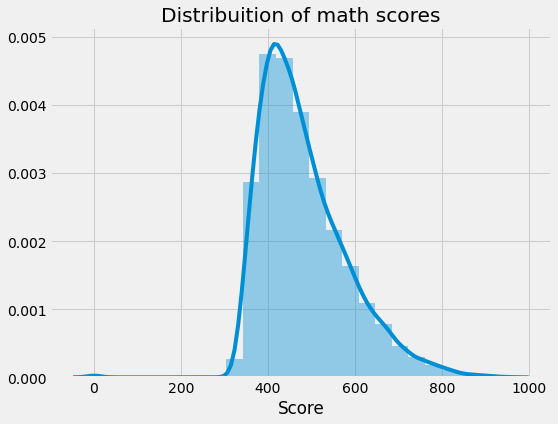

In [15]:
# Checking the distribution of the variable:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.distplot(train['NU_NOTA_MT'], bins=25)
plt.xlabel('Score')
plt.title('Distribuition of math scores');

In [16]:
# Descriptive statistics for target:
train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [17]:
print(f'Kurtosis: {train.NU_NOTA_MT.kurt()}')
print(f'Asymmetry: {train.NU_NOTA_MT.skew()}')

Kurtosis: 1.4225025820577502
Asymmetry: 0.9206896733932955


- **Kurtosis** is used to identify outliers in the distribution. Here, its value is > 3, which means that the distribution tails tend to be lighter than in normal distribution or, the lack of outliers.  

- The positive **asymmetry** means that we have a slightly tail on the right side of the distribution. The data is moderately skewed as our asymmetry value is between 0.5 and 1.

### Data cleaning and transforming

In [18]:
# Creating a function to remove irrelevant features
def data_cleaning(df):
    '''Removing irrelevant features'''

    df.drop(['TP_DEPENDENCIA_ADM_ESC',
             'TP_ENSINO',
             'CO_PROVA_CN',
             'CO_PROVA_CH',
             'CO_PROVA_LC',
             'CO_PROVA_MT',
             'SG_UF_RESIDENCIA',
             'CO_UF_RESIDENCIA',
             'TP_NACIONALIDADE',
             'IN_BAIXA_VISAO',
             'IN_CEGUEIRA',
             'IN_SURDEZ',
             'IN_DISLEXIA',
             'IN_DISCALCULIA',
             'IN_SABATISTA',
             'IN_GESTANTE',
             'IN_IDOSO',
             'TP_ANO_CONCLUIU','TP_PRESENCA_CN',
             'TP_LINGUA','TP_PRESENCA_CH',
             'IN_TREINEIRO', 'TP_PRESENCA_LC',
             'TP_ST_CONCLUSAO',
             'TP_STATUS_REDACAO', 
             'NU_IDADE',
             'Q027', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047'], axis=1, inplace=True)
    return df

In [19]:
#Aplicando a limpeza nos dados:
data_cleaning(train)
data_cleaning(test)
train.shape, test.shape

/home/mone/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((13730, 13), (4576, 12))

- Here, thecollumns were dropped after a manual analysis of the [data dictionary](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

In [20]:
# Creating a function to impute missing values:
def data_imputation(df):
    '''Imputing values to the missing data'''

    df.fillna(df.dtypes.replace({'float64': -100}), inplace=True)
    return df

In [21]:
train = train.copy()
data_imputation(train)

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
0,M,1,1,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,399.4
1,F,3,2,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,459.8
2,F,3,1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,F,0,1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,M,2,1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,M,1,1,438.2,419.7,394.5,120.0,120.0,80.0,80.0,40.0,440.0,403.2
13726,F,3,1,423.8,557.9,533.0,120.0,120.0,120.0,120.0,80.0,560.0,452.4
13727,F,1,1,460.5,528.9,569.3,120.0,120.0,120.0,120.0,120.0,600.0,398.0
13728,M,3,1,422.5,621.7,569.0,100.0,100.0,80.0,80.0,100.0,460.0,386.6


In [22]:
test = test.copy()
data_imputation(test)

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,F,3,1,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0
1,F,3,1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0
2,M,1,2,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0
3,F,3,1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,M,1,2,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4571,F,1,2,398.3,558.2,511.6,120.0,120.0,120.0,100.0,40.0,500.0
4572,M,2,2,427.6,579.7,471.1,100.0,100.0,100.0,120.0,100.0,520.0
4573,M,1,1,639.2,643.8,604.9,160.0,140.0,120.0,140.0,80.0,640.0
4574,M,2,1,427.1,467.9,540.2,140.0,80.0,80.0,140.0,80.0,520.0


### Creating a model by using *Pycaret* library

PyCaret is an open source, low-code machine learning library in Python that aims to reduce the cycle time from hypothesis to insights. It is well suited for seasoned data scientists who want to increase the productivity of their ML experiments by using PyCaret in their workflows or for citizen data scientists and those new to data science with little or no background in coding. PyCaret allows you to go from preparing your data to deploying your model within seconds using your choice of notebook environment.
Check more info [here](https://pycaret.org/guide/).

####  1- Seting up parameters:

- `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. It must called before executing any other function and takes two mandatory parameters: dataframe {array-like, sparse matrix} and name of the target column. All other parameters are optional.


- **data:** train data.

- **target:** target feature.

- **remove_multicollinearity:** When set to True, the variables with inter-correlations higher than the threshold defined under the multicollinearity_threshold are dropped. When two features are highly correlated with each other, the feature that is less correlated with the target variable is dropped.

- **multicollinearity_threshold:** Threshold used for dropping the correlated features. 

- **normalize:** When set to True, the feature space is transformed using the normalized_method param. Generally, linear algorithms perform better with normalized data however,  the results may vary and it is advised to run multiple experiments to evaluate the benefit of normalization. 

- **normalize_method:** Defines the method to be used for normalization. 

- **transform_target:** When set to True, target variable is transformed using the method defined in transform_target_method param. Target transformation is applied separately from feature transformations.

- **session_id:** If None, a random seed is generated and returned in the Information grid. The unique number is then distributed as a seed in all functions used during the experiment. This can be used for later reproducibility of the entire experiment.

In [23]:
# Creating a pipeline to setup the model
pipeline = setup(data=train, target='NU_NOTA_MT', 
                 remove_multicollinearity=True,
                 normalize_method='robust',
                 multicollinearity_threshold=0.95, 
                 normalize=True, 
                 transform_target=True, 
                 session_id=1991)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1991
1,Transform Target,True
2,Transform Target Method,yeo-johnson
3,Original Data,"(13730, 13)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


#### 2 - Comparing regression models

- `compare_models()` function uses all models in the model library and scores them using K-fold Cross Validation. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold (default CV = 10 Folds) of all the available models in model library.

In [24]:
compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,43.6572,4123.6872,64.1933,0.9436,0.1700,0.0890,0.1505
1,Gradient Boosting Regressor,43.6541,4128.4200,64.2300,0.9435,0.1678,0.0890,0.4628
2,CatBoost Regressor,44.4602,4302.9529,65.5721,0.9411,0.2023,0.0898,1.7247
3,Support Vector Machine,48.7238,4357.2254,65.9910,0.9404,0.2109,0.0415,2.1482
4,Light Gradient Boosting Machine,44.8898,4409.5651,66.3866,0.9397,0.2050,0.0919,0.1093
5,Random Forest,46.3093,4695.2128,68.5114,0.9358,0.1750,0.0966,0.4888
6,Extra Trees Regressor,48.4222,5150.0658,71.7600,0.9296,0.1916,0.1010,0.4047
7,Huber Regressor,50.6986,5174.5603,71.9208,0.9292,0.3618,0.0698,0.2083
8,Ridge Regression,51.2938,5181.3746,71.9676,0.9291,0.2955,0.0690,0.0050
9,Linear Regression,51.3276,5187.3432,72.0090,0.9290,0.2864,0.0693,0.0066


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1991,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

#### 3 - Creating a model

- `create_model()` function creates a model and scores it using K-fold Cross Validation (default = 10 Fold). The output prints a score grid that shows MAE, MSE, RMSE, RMSLE, R2 and MAPE. This function returns a trained model object. 

In [25]:
model = create_model('xgboost', fold=5, round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,42.87,3914.86,62.57,0.95,0.14,0.09
1,42.78,3980.53,63.09,0.95,0.19,0.09
2,43.13,4194.42,64.76,0.94,0.19,0.09
3,43.11,4002.20,63.26,0.94,0.13,0.09
4,46.39,4526.43,67.28,0.94,0.20,0.09
Mean,43.66,4123.69,64.19,0.94,0.17,0.09
SD,1.37,221.84,1.71,0.00,0.03,0.00


#### 4 - Model Tunning

- `tune_model()` function tunes the hyperparameters of a model and scores it using K-fold Cross Validation. The output prints the score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold (by default = 10 Folds). This function returns a trained model object.  

In [26]:
tuning_model = tune_model(model, fold=5, n_iter = 50, optimize = 'RMSE');

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.9148,4096.7315,64.0057,0.9444,0.1483,0.0760
1,44.5995,4115.8440,64.1548,0.9447,0.1991,0.0765
2,44.9364,4386.7064,66.2322,0.9408,0.2207,0.0762
3,45.2813,4179.2893,64.6474,0.9420,0.1500,0.0761
4,48.1084,4678.6964,68.4010,0.9345,0.2205,0.0840
Mean,45.5681,4291.4535,65.4882,0.9413,0.1877,0.0778
SD,1.2884,219.2562,1.6565,0.0037,0.0325,0.0031


#### 5 - Analysing results

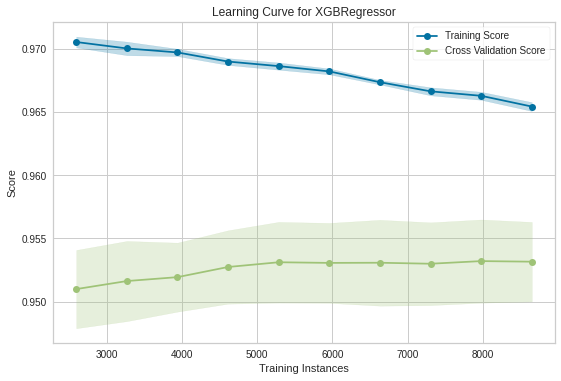

In [29]:
# Model learning Rate 
plot_model(tuning_model, plot='learning');

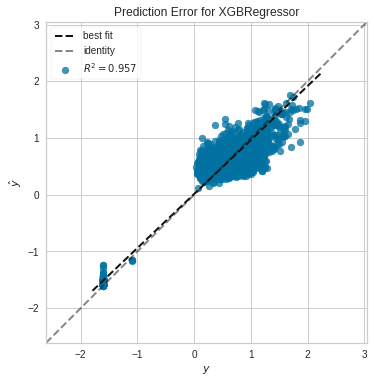

In [30]:
# Prediction Error 
plot_model(tuning_model, plot='error');

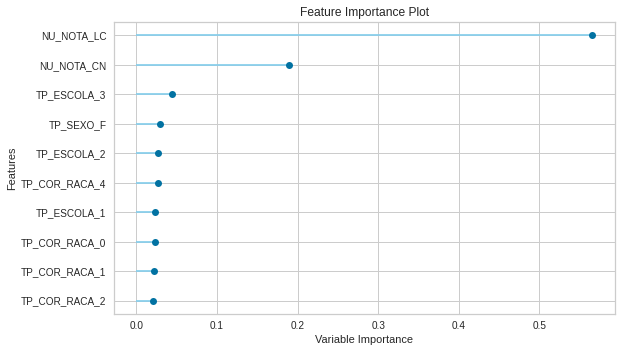

In [31]:
# Feature Importance
plot_model(tuning_model, plot='feature');

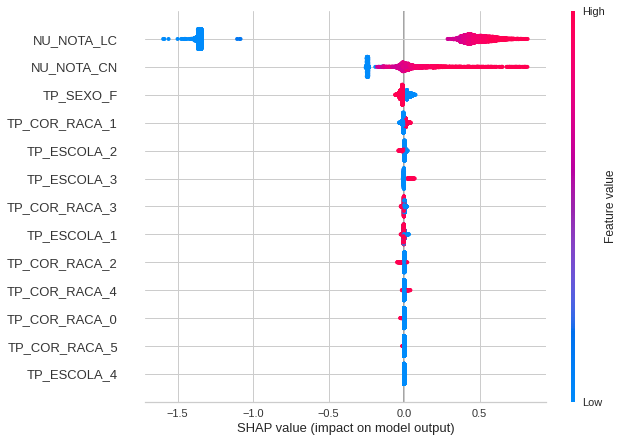

In [32]:
interpret_model(tuning_model)

#### 6 - Predicting math scores

- `predict_model()` is used to predict new data using a trained estimator. 

In [33]:
predictions = predict_model(tuning_model, data=test, round=2)
predictions

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Label
0,F,3,1,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0,453.500000
1,F,3,1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0,445.130005
2,M,1,2,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0,616.400024
3,F,3,1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-97.260002
4,M,1,2,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0,582.099976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,F,1,2,398.3,558.2,511.6,120.0,120.0,120.0,100.0,40.0,500.0,443.839996
4572,M,2,2,427.6,579.7,471.1,100.0,100.0,100.0,120.0,100.0,520.0,453.980011
4573,M,1,1,639.2,643.8,604.9,160.0,140.0,120.0,140.0,80.0,640.0,684.200012
4574,M,2,1,427.1,467.9,540.2,140.0,80.0,80.0,140.0,80.0,520.0,469.089996


#### 7- Visualizing predictions is answer dataframe

In [34]:
answer = pd.DataFrame({'NU_INSCRICAO':  answer['NU_INSCRICAO'],  'NU_NOTA_MT':predictions['Label'].round(2)})
answer.head(10)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,453.500000
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,445.130005
2,b38a03232f43b11c9d0788abaf060f7366053b6d,616.400024
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-97.260002
4,715494628a50142ce8cb17191cfe6d0f3cae0934,582.099976
5,e656d6bad65c93fb2880f1eba5037008c8e75774,469.279999
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,522.549988
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,436.329987
8,043c544a2104aa8a9849f1a703a08d37a2f16839,446.760010
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,442.399994


In [35]:
# limiting results between 0 and 1000
y_predict = np.clip(answer['NU_NOTA_MT'], 0, 1000)
y_predict =  pd.DataFrame({'NU_INSCRICAO':  answer['NU_INSCRICAO'],  'NU_NOTA_MT':y_predict.round(2)})
y_predict.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,453.500000
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,445.130005
2,b38a03232f43b11c9d0788abaf060f7366053b6d,616.400024
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,582.099976


#### 8 - Storing results in a .csv file

In [36]:
y_predict.to_csv('answer.csv',index=False,header=True)

In [37]:
# save a model
save_model(tuning_model, 'xgboost_enem_prediction')

Transformation Pipeline and Model Succesfully Saved
